In [1]:
import pandas as pd
import matplotlib as mplt
import seaborn as sns
import numpy as np
from scipy.stats import skew
%matplotlib inline

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# With Pandas

In [2]:
df = pd.read_excel('netflix_titles.xlsx', sheet_name='netflix_titles')

In [3]:
# basic cleansing
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'], errors='coerce')
df['duration_seasons'] = pd.to_numeric(df['duration_seasons'], errors='coerce')
df['type'] = pd.Categorical(df['type'])
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'])
df['rating'] = pd.Categorical(df['rating'])

In [4]:
# preview data
df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90.0,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94.0,NaN,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1.0,TV Show,Transformers Prime,2018-09-08,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1.0,TV Show,Transformers: Robots in Disguise,2018-09-08,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99.0,NaN,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [5]:
# Let's look at the movies
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df.drop(columns=['duration_seasons', 'show_id']).dropna()

In [6]:
movies_df.head()

,duration_minutes,type,title,date_added,release_year,rating,description
0,90.0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...
1,94.0,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...
4,99.0,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...
6,110.0,Movie,Automata,2017-09-08,2014.0,R,"In a dystopian future, an insurance adjuster f..."
7,60.0,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017.0,TV-MA,Fabrizio Copano takes audience participation t...


In [7]:
movies_df['rating_code'] = movies_df['rating'].cat.codes

In [8]:
# basic descriptive stats
movies_df.describe()

,duration_minutes,release_year,rating_code
count,4256.000000,4256.000000,4256.000000
mean,99.170348,2012.365367,6.500000
std,28.045253,9.687998,2.160319
min,3.000000,1942.000000,0.000000
25%,86.000000,2012.000000,5.000000
50%,98.000000,2016.000000,6.000000
75%,115.000000,2017.000000,8.000000
max,312.000000,2020.000000,13.000000


In [9]:
movies_df['duration_minutes'].median()

98.0

In [10]:
movies_df['duration_minutes'].skew()

0.1932954535298606

In [11]:
movies_df['duration_minutes'].mean()

99.1703477443609

In [12]:
movies_df['duration_minutes'].quantile(0.8)

120.0

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_minutes'>

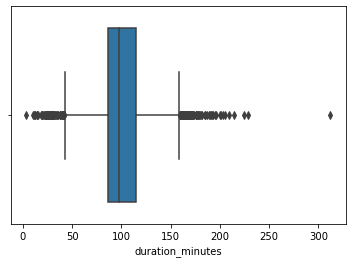

In [13]:
sns.boxplot(movies_df['duration_minutes'])

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_minutes'>

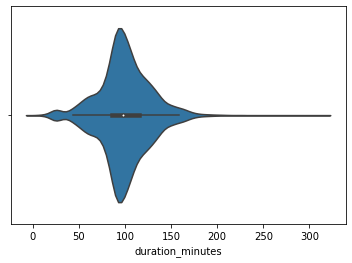

In [14]:
# violin plot = boxplot with kde (i.e. the value_counts graphed)
sns.violinplot(movies_df['duration_minutes'])

<AxesSubplot:xlabel='duration_minutes', ylabel='Density'>

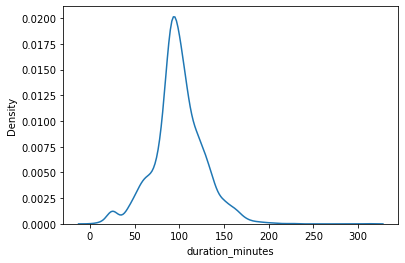

In [15]:
sns.kdeplot(movies_df['duration_minutes'])

In [16]:
movies_df['release_year'].mean()

2012.3653665413533

In [17]:
movies_df['release_year'].median()

2016.0

In [18]:
movies_df['release_year'].skew()

-3.2329526796305625

In [19]:
movies_df['release_year'].quantile(0.8)

2018.0

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year'>

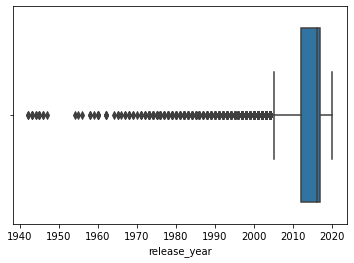

In [32]:
sns.boxplot(movies_df['release_year'])

<AxesSubplot:xlabel='release_year', ylabel='Count'>

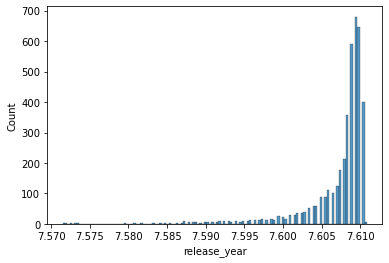

In [72]:
sns.histplot(np.log(movies_df['release_year']))

<AxesSubplot:>

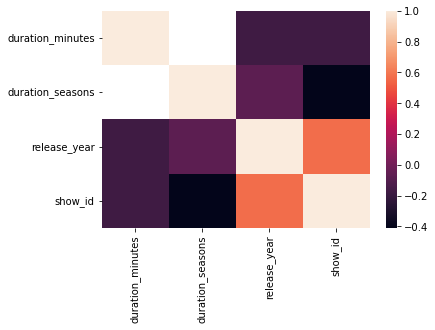

In [21]:
# heatmap of the correlations
sns.heatmap(df.corr(method='pearson'))

In [22]:
df.corr(method='pearson')

,duration_minutes,duration_seasons,release_year,show_id
duration_minutes,1.000000,NaN,-0.174908,-0.176906
duration_seasons,NaN,1.000000,-0.072157,-0.411127
release_year,-0.174908,-0.072157,1.000000,0.569812
show_id,-0.176906,-0.411127,0.569812,1.000000


<AxesSubplot:>

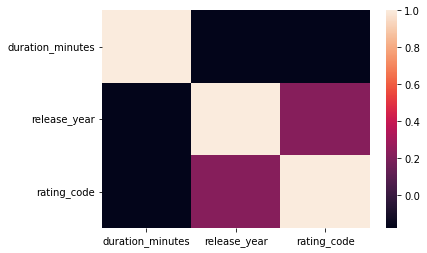

In [23]:
sns.heatmap(movies_df.corr(method='pearson'))

<AxesSubplot:>

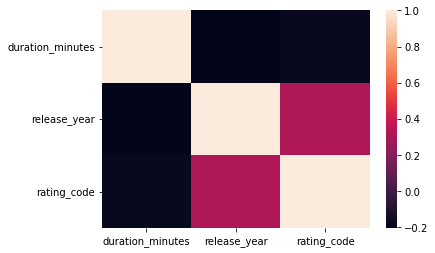

In [24]:
sns.heatmap(movies_df.corr(method='spearman'))

In [25]:
release_years = movies_df['release_year'].values

# With Numpy + Scipy

In [26]:
release_years

array([2019., 2016., 2017., ..., 2015., 2014., 2015.])

In [27]:
release_years.mean()

2012.3653665413533

In [28]:
np.median(release_years)

2016.0

In [29]:
release_years.std()

9.68686003256264

In [30]:
np.quantile(release_years, 0.5)

2016.0

In [31]:
skew(release_years)

-3.2318131345503205